# Exercise5

In [1]:
import pandas as pd
import numpy as np

In [3]:
products = pd.DataFrame([{'Product ID':'4109','Price':'5.0', 'Product':'Sushi Roll'},
                       {'Product ID':'1412','Price':'0.5', 'Product':'Egg'},
                       {'Product ID':'8931','Price':'1.5', 'Product':'Bagel'} ])

products.set_index('Product ID', inplace = True)
products

,Price,Product
Product ID,,
4109,5.0,Sushi Roll
1412,0.5,Egg
8931,1.5,Bagel


In [4]:
invoice = pd.DataFrame([{'Customer': 'Ali','Product ID':'4109','Quantity':1},
                       {'Customer': 'Eric','Product ID':'1412','Quantity':12},
                       {'Customer': 'Ande','Product ID':'8931','Quantity':6},
                       {'Customer': 'Sam','Product ID':'4109','Quantity':2}])

invoice

,Customer,Product ID,Quantity
0,Ali,4109,1
1,Eric,1412,12
2,Ande,8931,6
3,Sam,4109,2


In [5]:
# 외부조인
# 왼쪽은 index사용, 오른쪽은 index가 없기 때문에 on사용
merged = pd.merge(products, invoice, how = 'outer', left_index=True,right_on='Product ID')
merged

,Price,Product,Customer,Product ID,Quantity
0,5.0,Sushi Roll,Ali,4109,1
3,5.0,Sushi Roll,Sam,4109,2
1,0.5,Egg,Eric,1412,12
2,1.5,Bagel,Ande,8931,6


In [6]:
# right 조인
merged = pd.merge(products, invoice, how = 'right', left_index=True,right_on='Product ID')
merged

,Price,Product,Customer,Product ID,Quantity
0,5.0,Sushi Roll,Ali,4109,1
1,0.5,Egg,Eric,1412,12
2,1.5,Bagel,Ande,8931,6
3,5.0,Sushi Roll,Sam,4109,2


# Subplots

<IPython.core.display.Javascript object>


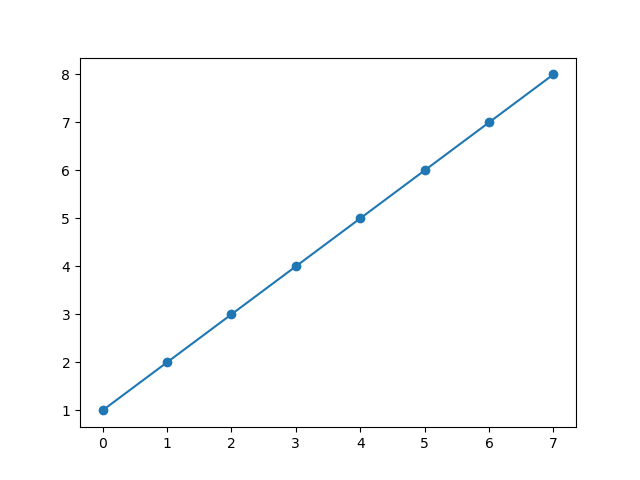

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8])
plt.figure()
plt.plot(x,'-o')

<IPython.core.display.Javascript object>


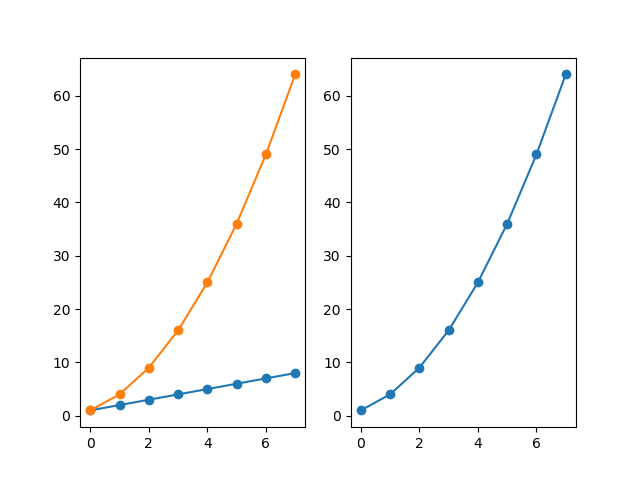

In [9]:
# subplot 나눠진 plot의 형태
# (행,열,index) 로 파라미터를 넣는다
# 1행 2열의 subplot중 index에 넣는다
# 즉, 두개의 subplot중 1에 subplot을 만든다
plt.figure()
plt.subplot(1,2,1)

linear_data = x
plt.plot(linear_data,'-o')

In [10]:
# 나머지 index = 2 부분에 subplot 생성
exponential_data = linear_data**2

plt.subplot(1,2,2)
plt.plot(exponential_data,'-o')

In [11]:
# subplot 1에 해당 그래프 추가
plt.subplot(1,2,1)
plt.plot(exponential_data,'-o')

C:\Users\SUNGYONG\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<IPython.core.display.Javascript object>


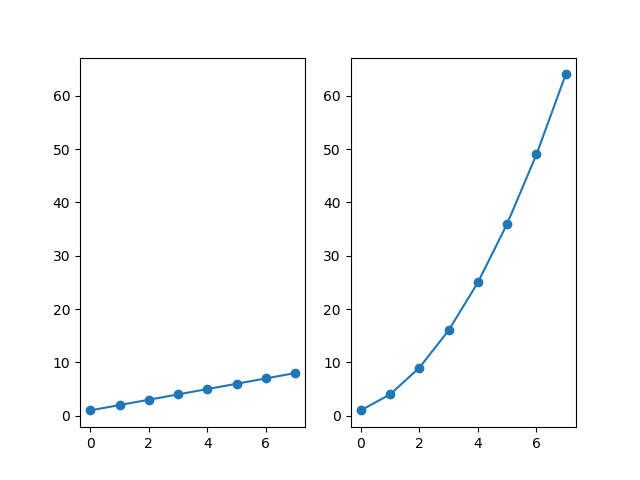

In [13]:
# share
# 표의 비교를 위해 scale을 맞추는 것

plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')

# sharey 파라미터를 통해 ax1과 scale을 맞춘다
ax1 = plt.subplot(1,2,2, sharey = ax1)
plt.plot(exponential_data, '-o')


<IPython.core.display.Javascript object>


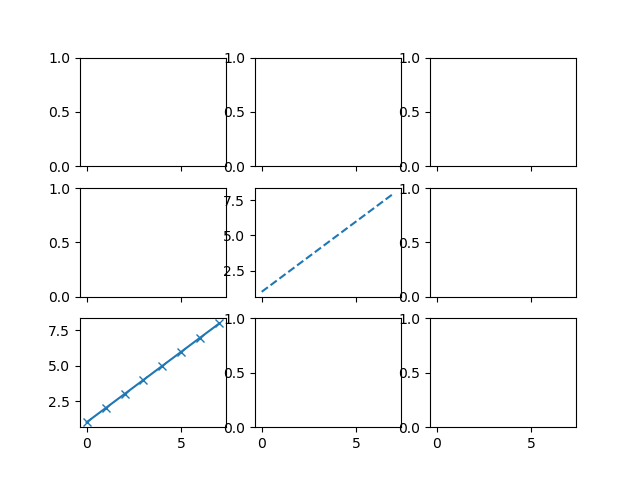

In [14]:
# subplot의 다양한 형태
# ax 는 변수
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharex = True, sharey=False)

In [15]:
ax5.plot(linear_data,'--')

In [17]:
ax7.plot(linear_data,'-x')

<IPython.core.display.Javascript object>


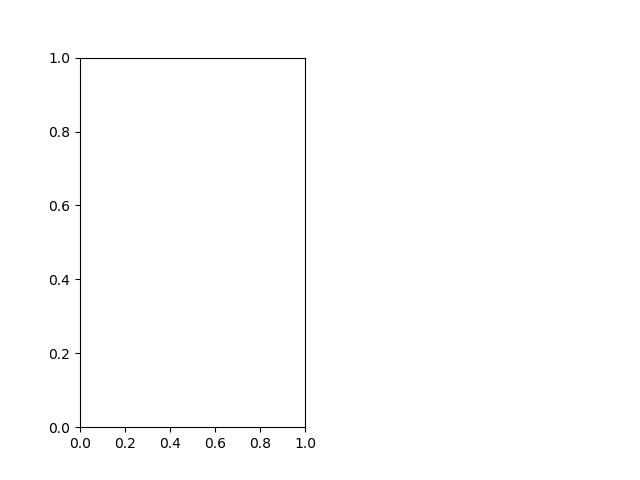

C:\Users\SUNGYONG\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


True

In [18]:
# 이렇게 행렬 값을 넣어줄 수 있다
plt.figure()
plt.subplot(1,2,1) == plt.subplot(121)

# Histograms

<IPython.core.display.Javascript object>


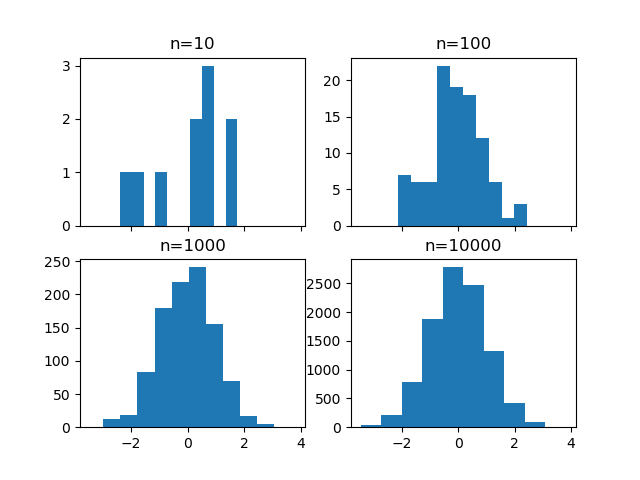

In [27]:
# 히스토그램은 빈도를 나타내는 그래프이다

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex = True)
axs = [ax1,ax2,ax3,ax4]

In [28]:
# normal distribution 정규 분포에 해당하는 random 값을 의미
# 평균에 몰려있는 값, 대부분의 데이터가 표준편차 안에 존재하는 것을 의미
# 표준 정규분포

# 랜덤 샘플링 결과(normal 을 사용하기 때문에 정규분포 안에 몰려있는걸 볼 수 있다)
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0,scale = 1.0,size = sample_size)
    #히스토그램 생성
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


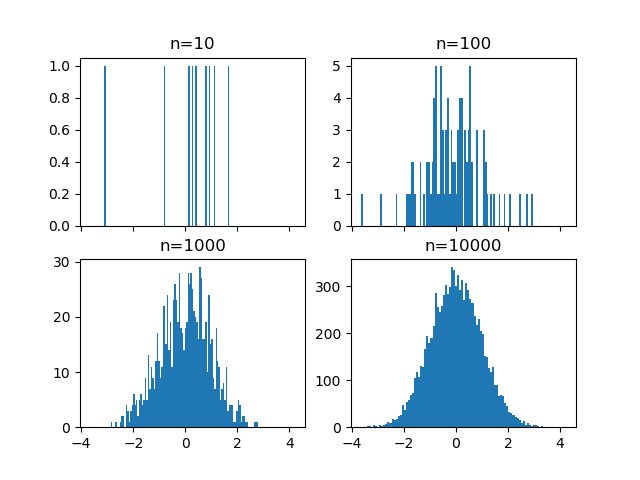

In [29]:
# bins를 이용하여 그래프를 좀 더 세세하게 표현해줌
# bins가 data 샘플을 좀더 잘게 나눠줌

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex = True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0,scale = 1.0,size = sample_size)
    #히스토그램 생성
    axs[n].hist(sample,bins = 100)
    axs[n].set_title('n={}'.format(sample_size))

In [30]:
# 위에서 normal distribution을 이용해 그린 데이터값들
sample

array([-0.14663786,  0.14768709,  0.37214733, ...,  0.84353705,
       -0.09422787, -1.88456778])

<IPython.core.display.Javascript object>


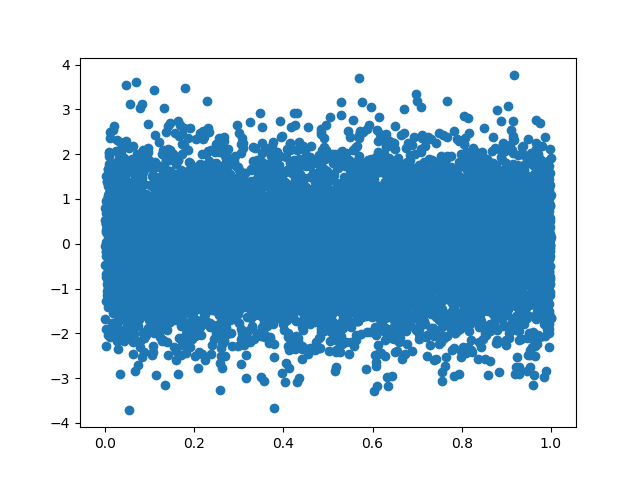

In [32]:
# x 축엔 normal random  값들
# y 축에 uniform random 값들
plt.figure()
Y = np.random.normal(loc = 0.0, scale = 1.0, size =10000)
X = np.random.random(size = 10000)

plt.scatter(X,Y)

<IPython.core.display.Javascript object>


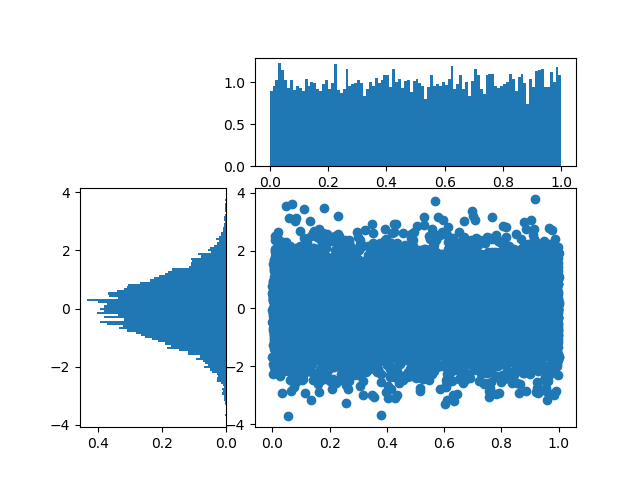

In [36]:
# grid는 화면을 나누는 것ㄴ
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

# gspec은 위치
top_histogram = plt.subplot(gspec[0,1:])
side_histogram = plt.subplot(gspec[1:,0])
lower_right = plt.subplot(gspec[1:,1:])

In [37]:
# 해당 그리드에 X,Y 맵핑
# left와 top을 통해 noraml과 uniform distribution의 빈도를 가시적으로 확인

lower_right.scatter(X,Y)
top_histogram.hist(X,bins = 100)
s = side_histogram.hist(Y,bins =100,orientation='horizontal')

In [39]:
# normalization
# 구간의 크기로 나눈것, norm 을통해 왼쪽 label을 1로 바꾼다

top_histogram.clear()
top_histogram.hist(X,bins=100, normed = True)
side_histogram.clear()
side_histogram.hist(Y,bins=100,orientation='horizontal',normed = True)

# side의 좌우를 반전시키고 싶어 사용
side_histogram.invert_xaxis()

C:\Users\SUNGYONG\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\SUNGYONG\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
